In [1]:
import pandas as pd
inventory_df = pd.read_csv('data/inventory_data.csv')

In [2]:
inventory_df['Overstock'] = inventory_df['Current_Stock'] - inventory_df['Min_Required']

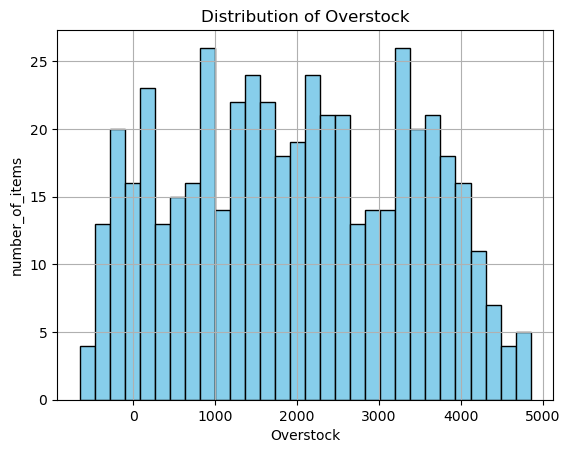

In [3]:
import matplotlib.pyplot as plt
inventory_df['Overstock'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Overstock')
plt.xlabel('Overstock')
plt.ylabel('number_of_items')
plt.show()


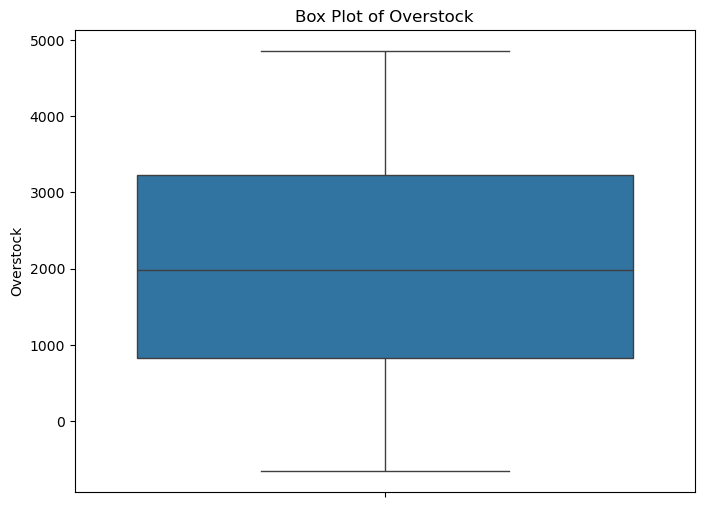

In [4]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=inventory_df['Overstock'])
plt.title('Box Plot of Overstock')
plt.show()


In [5]:
overstock_by_item = inventory_df.groupby('Item_Name')['Overstock'].mean()
overstock_by_item = overstock_by_item.sort_values(ascending=False)
print(overstock_by_item)


Item_Name
IV Drip          2064.119266
X-ray Machine    2031.214286
Gloves           2003.070707
Surgical Mask    1882.214286
Ventilator       1870.020833
Name: Overstock, dtype: float64


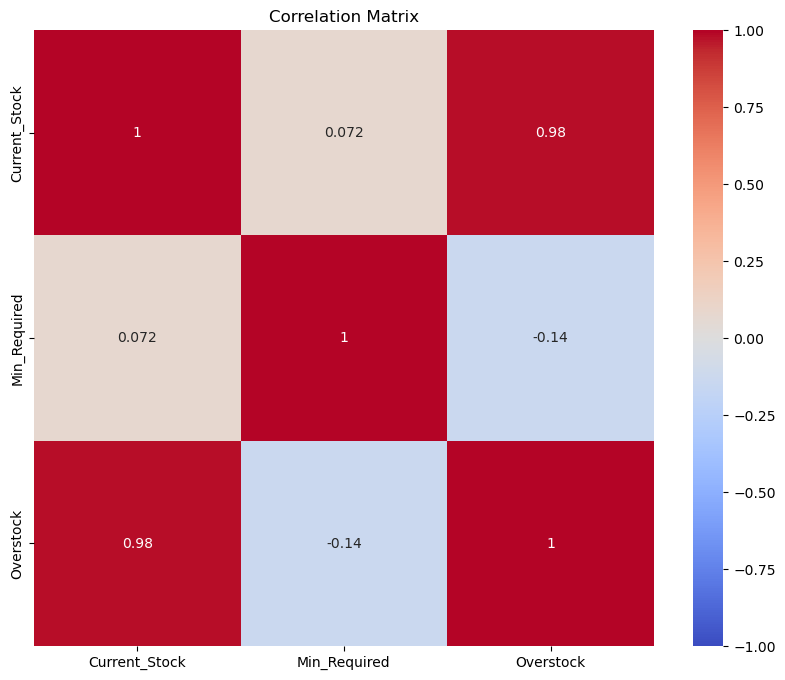

In [6]:
import seaborn as sns
plt.figure(figsize=(10, 8))
corr = inventory_df[['Current_Stock', 'Min_Required', 'Overstock']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [7]:
Overstock is dominiring, with many items having significant excess stock relative to the minimum required levels.

The Current Stock directly contributes to the overstock, as evidenced by the strong correlation (0.98).
.



SyntaxError: invalid syntax (1469911448.py, line 1)

In [ ]:
import pandas as pd

# Assuming 'inventory_df' has a 'Date' column and is in datetime format
inventory_df['Date'] = pd.to_datetime(inventory_df['Date'])

# Extract month and year from the Date column
inventory_df['Month'] = inventory_df['Date'].dt.month
inventory_df['Year'] = inventory_df['Date'].dt.year

# List of items to aggregate data for: Gloves, Surgical Mask, IV Drip
items_to_aggregate = ['Gloves', 'Surgical Mask', 'IV Drip']

# Create a dictionary to hold the aggregated data
aggregated_data = {}

for item in items_to_aggregate:
    # Filter data for the specific item
    item_data = inventory_df[inventory_df['Item_Name'] == item]
    
    # Group by Year and Month, and calculate mean for each feature
    monthly_data = item_data.groupby(['Year', 'Month']).agg({
        'Avg_Usage_Per_Day': 'mean',
        'Current_Stock': 'mean',
        'Restock_Lead_Time': 'mean',
        'Min_Required': 'mean'
    }).reset_index()

    # Store the aggregated data
    aggregated_data[item] = monthly_data

    # Display the first few rows of the aggregated data for each item
    print(f"Aggregated Data for {item}:")
    print(monthly_data.head())
    print('-' * 30)


Aggregated Data for Gloves:
   Year  Month  Avg_Usage_Per_Day  Current_Stock  Restock_Lead_Time  \
0  2024     10         242.166667    2570.333333          17.666667   
1  2024     11         203.500000    2581.500000          17.000000   
2  2024     12         317.166667    2293.166667          23.833333   
3  2025      1         238.500000    2739.166667          11.500000   
4  2025      2         149.200000    2179.800000           8.200000   

   Min_Required  
0    390.666667  
1    442.833333  
2    391.000000  
3    669.666667  
4    340.000000  
------------------------------
Aggregated Data for Surgical Mask:
   Year  Month  Avg_Usage_Per_Day  Current_Stock  Restock_Lead_Time  \
0  2024     10         287.000000    2779.428571          12.142857   
1  2024     11         301.333333    2274.666667          17.666667   
2  2024     12         354.666667    3155.000000          22.000000   
3  2025      1         161.166667    1564.666667          11.000000   
4  2025      2  